In [1]:
#Description use %R Willium to find Buy and Sell Price
#Import libraries
from datetime import datetime
import MetaTrader5 as mt5 
import pandas as pd
pd.set_option('display.max_columns', 500) # number of columns to be displayed
pd.set_option('display.width', 30000)      # max table width to display
import numpy as np
import pytz 
import talib as ta
from talib import MA_Type
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
# establish connection to MetaTrader 5 terminal 
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error()) 
    quit()

# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
utc_from = datetime(2020, 9,23, hour = 23, minute = 59,microsecond = 999999,tzinfo=timezone)
utc_to = datetime(2020, 10, 5, hour = 23, minute = 59,microsecond = 999999,tzinfo=timezone)
rates = mt5.copy_rates_range("GOLD", mt5.TIMEFRAME_H1, utc_from, utc_to)

# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()
df = pd.DataFrame(rates)
# convert time in seconds into the 'datetime' format
df['time']=pd.to_datetime(df['time'], unit='s')
#set 'time' to be index
#df = df.set_index(pd.DatetimeIndex(df['time'].values))
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2020-09-24 01:00:00,1863.10,1864.79,1855.06,1858.50,1701,33,0
1,2020-09-24 02:00:00,1858.73,1860.43,1853.67,1854.85,2319,33,0
2,2020-09-24 03:00:00,1854.85,1861.43,1854.73,1861.37,2749,33,0
3,2020-09-24 04:00:00,1861.43,1868.77,1859.69,1861.91,3799,33,0
4,2020-09-24 05:00:00,1861.87,1864.92,1857.97,1859.92,3118,33,0
...,...,...,...,...,...,...,...,...
179,2020-10-05 19:00:00,1913.89,1917.32,1911.80,1916.12,3044,33,0
180,2020-10-05 20:00:00,1916.14,1916.47,1913.93,1915.38,2266,33,0
181,2020-10-05 21:00:00,1915.39,1915.39,1912.97,1913.95,2255,33,0
182,2020-10-05 22:00:00,1913.93,1914.15,1910.81,1910.93,2195,33,0


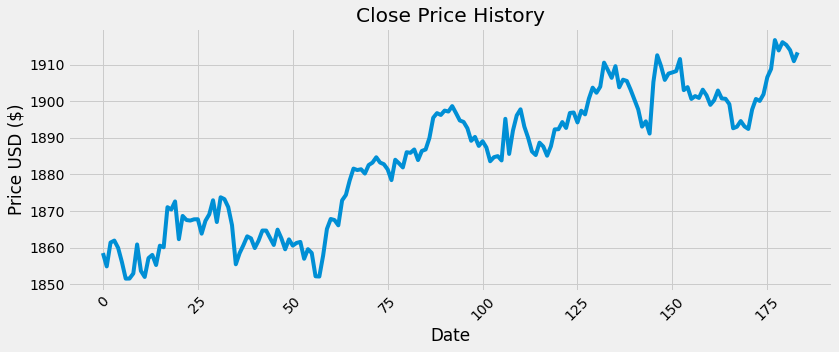

In [3]:
#Show stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['close'],label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [4]:
df['williams'] = ta.WILLR(
                                df['high'],
                                df['low'],
                                df['close'],
                                timeperiod=10)
Swilliams = df.williams /10 + 1900
Swilliams1 = df.williams/10
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,williams
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0,175.000000
mean,1883.821413,1886.881033,1880.973478,1884.073750,2945.679348,32.831522,0.0,-43.208372
std,18.085869,17.834376,18.336753,18.113956,1287.988299,1.585069,0.0,28.021740
min,1851.550000,1854.440000,1848.660000,1851.510000,658.000000,23.000000,0.0,-96.636925
25%,1866.142500,1869.555000,1863.090000,1866.765000,1782.000000,33.000000,0.0,-67.948407
50%,1886.160000,1889.205000,1883.880000,1886.600000,3042.500000,33.000000,0.0,-39.422135
75%,1898.305000,1901.002500,1896.517500,1898.745000,4012.750000,33.000000,0.0,-18.209074
max,1916.750000,1918.550000,1913.930000,1916.700000,5437.000000,43.000000,0.0,-0.000000
